In [33]:
#libs necessarias
import pandas as pd
import numpy as np

#libs graficas
import matplotlib.pyplot as plt
import seaborn as sns

#avisos
import warnings
warnings.filterwarnings('ignore')

#configuração pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

#configuração matplotlib

#plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# Exploração dos dados

In [34]:
#quanto vale o aluguel de uma casa?

In [35]:
df = pd.read_csv('../data/house_data.csv')

In [36]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [37]:
df.shape

(10692, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


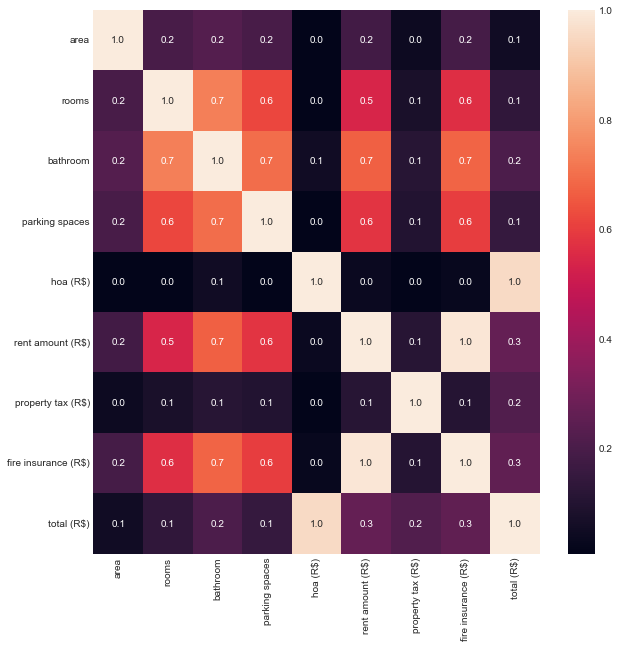

In [39]:
plt.rcParams['figure.figsize']=10,10
g = sns.heatmap(df.corr(),annot=True, fmt = ".1f")

In [40]:
# Removendo colunas
df.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

In [41]:
df.shape

(10692, 11)

In [42]:
# campos vazios
df.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [43]:
# campos unicos
df.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [44]:
#tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [45]:
df.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **Exploração Analitica (EDA)**

In [46]:
#Filtrar os tipos de colunas
Colunas_categoricas = df.columns[ df.dtypes == object ]
Colunas_numericas = df.columns[ df.dtypes != object ]

Colunas_categoricas,Colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [47]:
# Fotografia ** 
# Serve para saber se dados que nao contem uma data foram sendo alterados conforme o tempo e quem sabe gere uma alteração no comportamento do algoritmo podendo deixar o modelo mais lento, ex:
# Dados --> 90% acc animal | prox semestre 50% acc animal

In [48]:
df['city'].value_counts(normalize=True) *100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [49]:
#loop
for Coluna in Colunas_categoricas:
    Analise = df[Coluna].value_counts(normalize=True)*100
    print(Coluna)
    print(Analise)
    print('')

city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64

animal
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64

furniture
not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64



In [50]:
#Correção dos dados

In [51]:
df.loc[df['floor']== '301']
df.iloc[2562, 5] = 30

In [52]:
df.loc[df['floor']== 30]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,30,acept,not furnished,750,2600,164


In [53]:
#ajustar o '-'
df['floor'] = df['floor'].apply( lambda Registro : 0 if Registro == '-' else Registro )

In [54]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [56]:
df['floor'] = pd.to_numeric(df['floor'])

In [57]:
#verificar
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


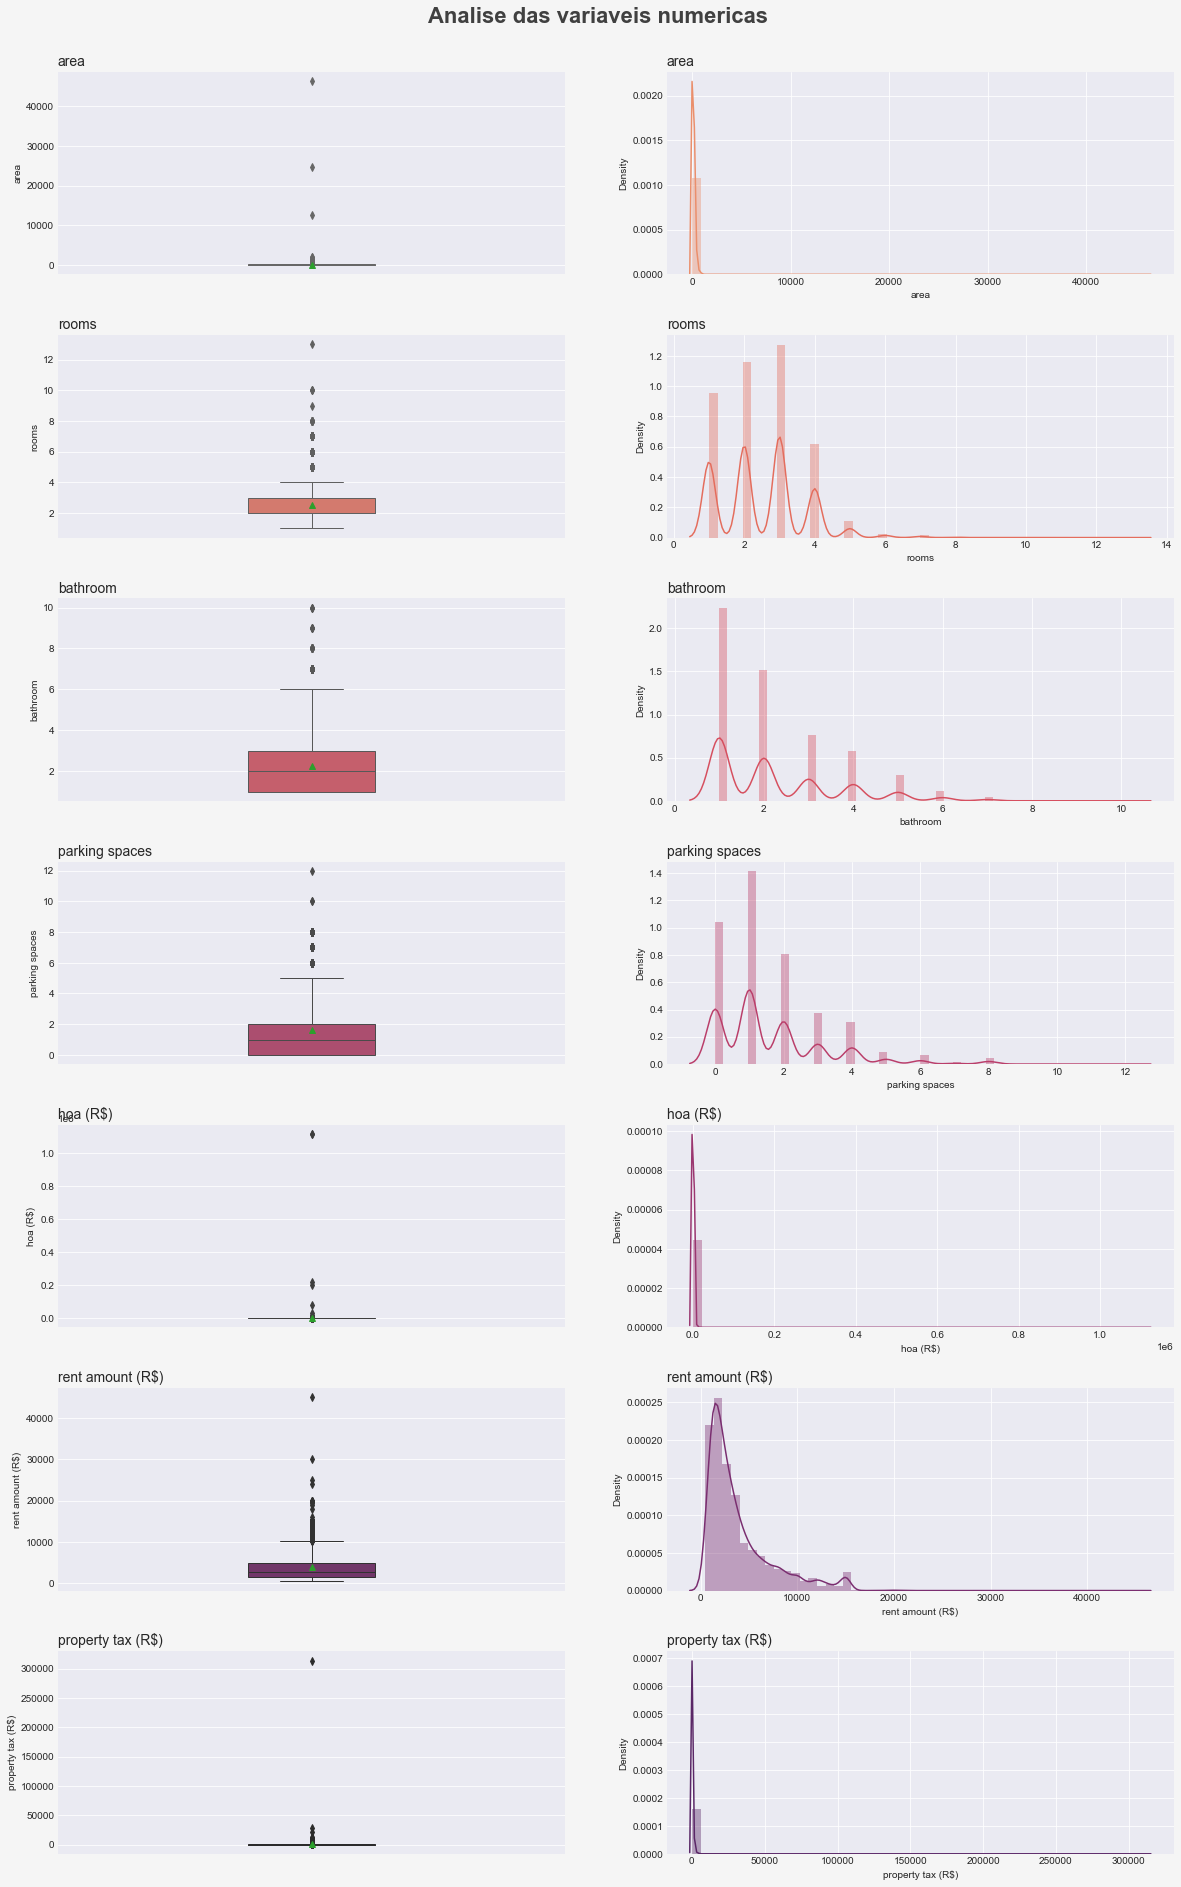

In [78]:
#Grid Graficos

Figura, Eixo = plt.subplots(figsize=(20,30))

#cor de fundo

Cor_fundo = '#f5f5f5'
Figura.set_facecolor ( Cor_fundo)

# Paleta cores

Paleta_Cores = sns.color_palette('flare', len(Colunas_numericas)*2 )

#titulo

plt.suptitle('Analise das variaveis numericas', fontsize=22, color='#404040', fontweight=600)

# Estrutura
Linhas = 7
Colunas = 2
Posicao = 1 

for Coluna in Colunas_numericas:
    plt.subplot( Linhas, Colunas, Posicao)
    plt.title(f'{Coluna}', loc='left', fontsize=14, fontweight=200)
    sns.boxplot (data=df, y=Coluna, showmeans=True, saturation=0.75, linewidth=1, color=Paleta_Cores[Posicao], width=0.25)
    Posicao += 1
    
    plt.subplot( Linhas, Colunas, Posicao)
    plt.title(f'{Coluna}', loc='left', fontsize=14, fontweight=200)
    sns.distplot(df[Coluna], color=Paleta_Cores[Posicao -1])
    Posicao += 1
    
# ajuste do grid de fundo
plt.subplots_adjust( top=0.95, hspace=0.3)

In [79]:
df.loc[df['area'] <= 10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [81]:
df['hoa (R$)'].max()

1117000

In [83]:
df.loc[df['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [85]:
df['hoa (R$)'].sort_values(ascending=False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [86]:
df.iloc[255]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

In [87]:
df['rent amount (R$)'].sort_values(ascending=False).head(20)

2182     45000
7748     30000
6947     25000
2619     24000
1743     20000
2859     20000
1253     20000
5525     20000
157      20000
6185     19500
2521     19000
5741     18000
6118     16000
2647     15000
8680     15000
10265    15000
1276     15000
10283    15000
1862     15000
4224     15000
Name: rent amount (R$), dtype: int64

In [88]:
df.iloc[2182]

city                     São Paulo
area                           700
rooms                            4
bathroom                         7
parking spaces                   8
floor                            0
animal                       acept
furniture            not furnished
hoa (R$)                         0
rent amount (R$)             45000
property tax (R$)             8750
Name: 2182, dtype: object

In [89]:
df['property tax (R$)'].sort_values(ascending=False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [90]:
df.iloc[6645]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

# **Engenharia de features**